<a href="https://colab.research.google.com/github/its-amrita-sarkar-01/Ecommerce-Churn/blob/main/ECommerce_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.**

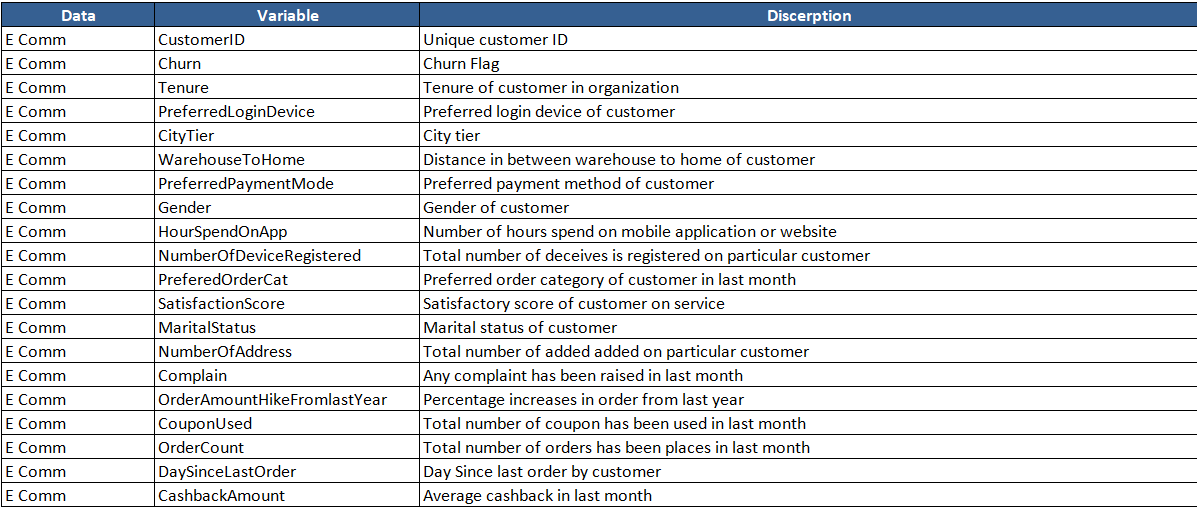

In [1]:
# importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx')

In [3]:
# dataset
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
# dropping off the customer-id
df.drop(['CustomerID'], axis = 1, inplace = True)

In [8]:
# inspection about the missing data
data_type = df.dtypes
Value_Missing = df.isnull().sum()
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending=False)
missing_value_df = pd.DataFrame({'Data Type': data_type,
                                 'Total Null Values' : Value_Missing,
                                 'Percent Missing (%)': percent_missing})

In [9]:
missing_value_df

,Data Type,Total Null Values,Percent Missing (%)
CashbackAmount,float64,0,0.00
Churn,int64,0,0.00
CityTier,int64,0,0.00
Complain,int64,0,0.00
CouponUsed,float64,256,4.55
DaySinceLastOrder,float64,307,5.45
Gender,object,0,0.00
HourSpendOnApp,float64,255,4.53
MaritalStatus,object,0,0.00
NumberOfAddress,int64,0,0.00


In [10]:
# object type variables
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print('\nThe values are:')
        print() 
        print(df[i].value_counts())
        print()

PreferredLoginDevice

The values are:

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

PreferredPaymentMode

The values are:

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Gender

The values are:

Male      3384
Female    2246
Name: Gender, dtype: int64

PreferedOrderCat

The values are:

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

MaritalStatus

The values are:

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



In [11]:
# statistical view of numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


In [12]:
numeric_features = df.describe().columns
numeric_features

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

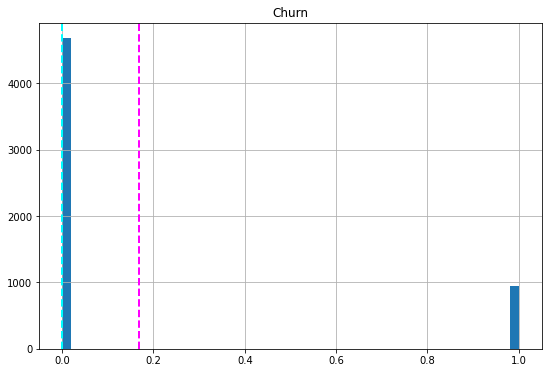

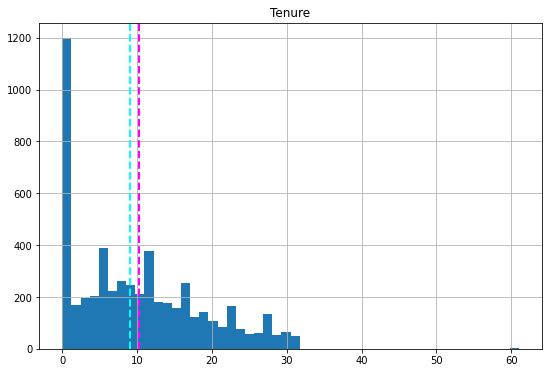

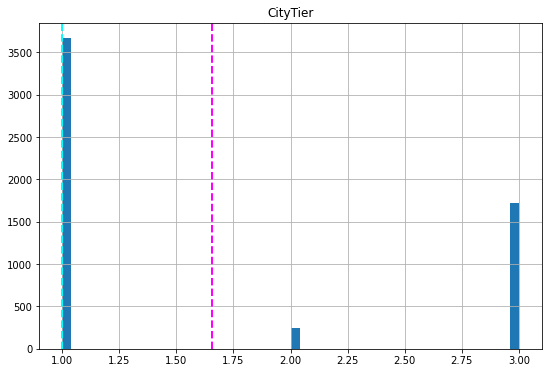

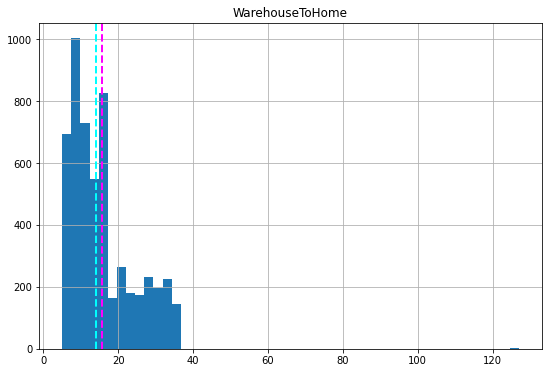

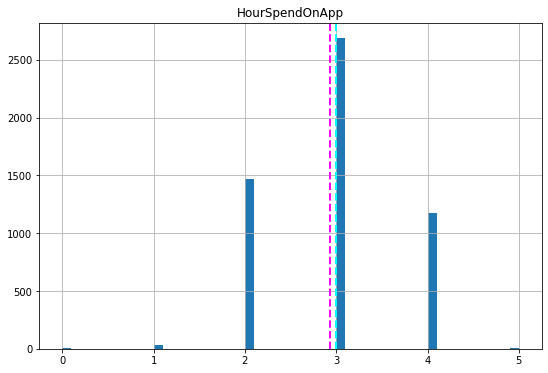

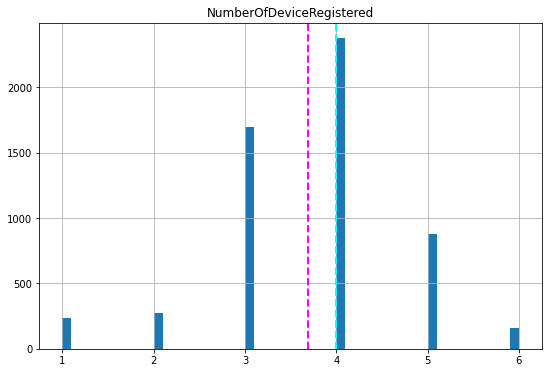

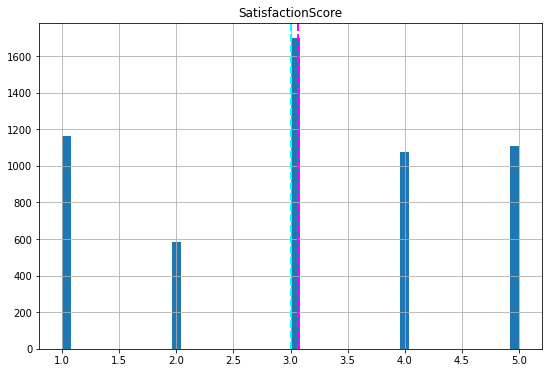

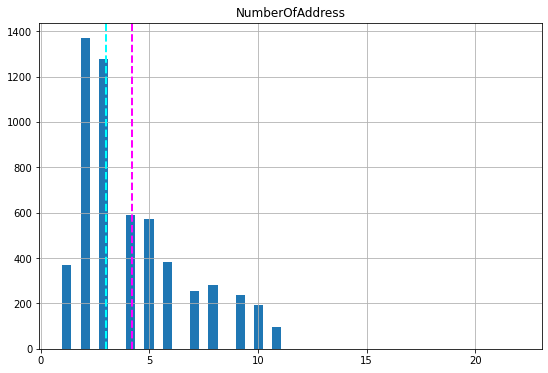

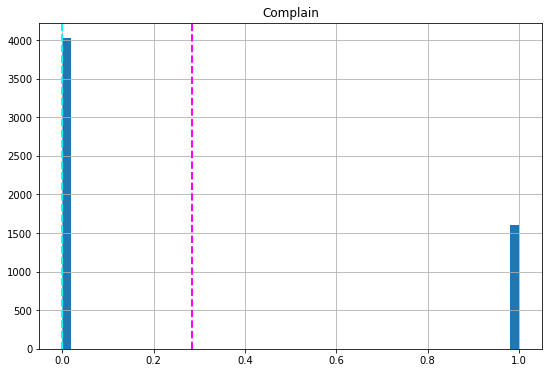

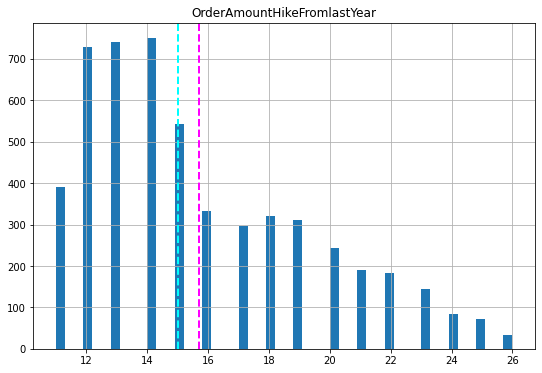

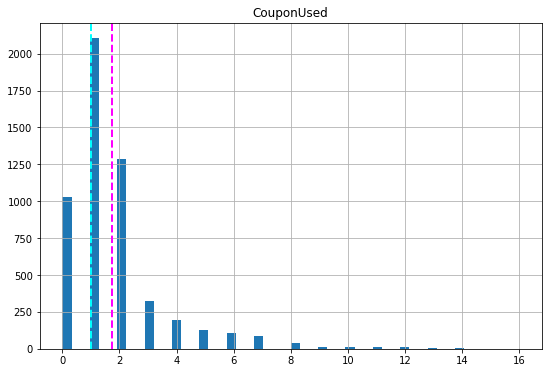

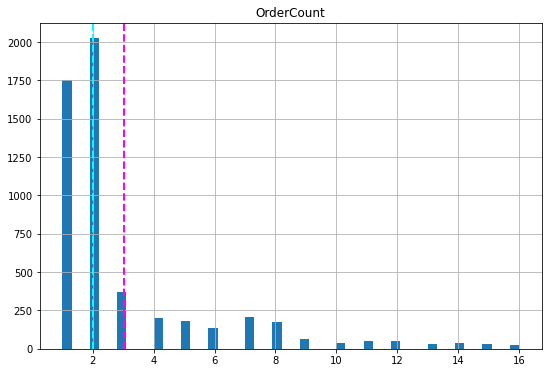

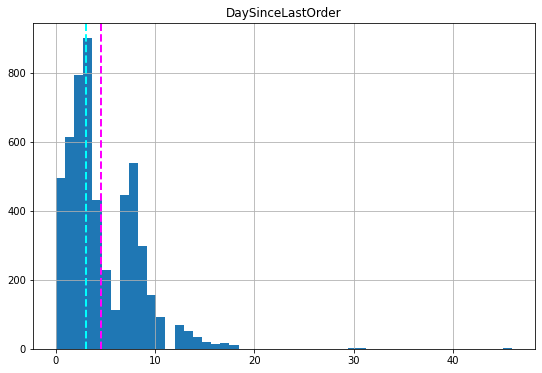

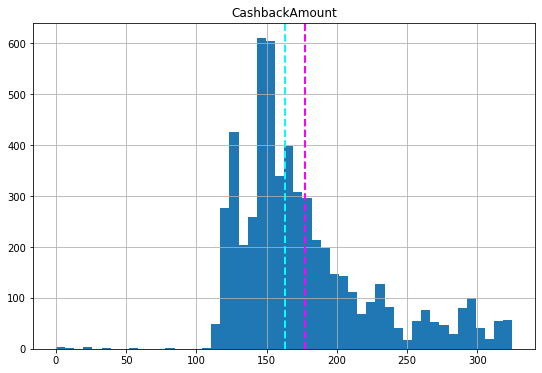

In [13]:
# plotting the numerical columns
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Text(0, 0.5, 'Values')

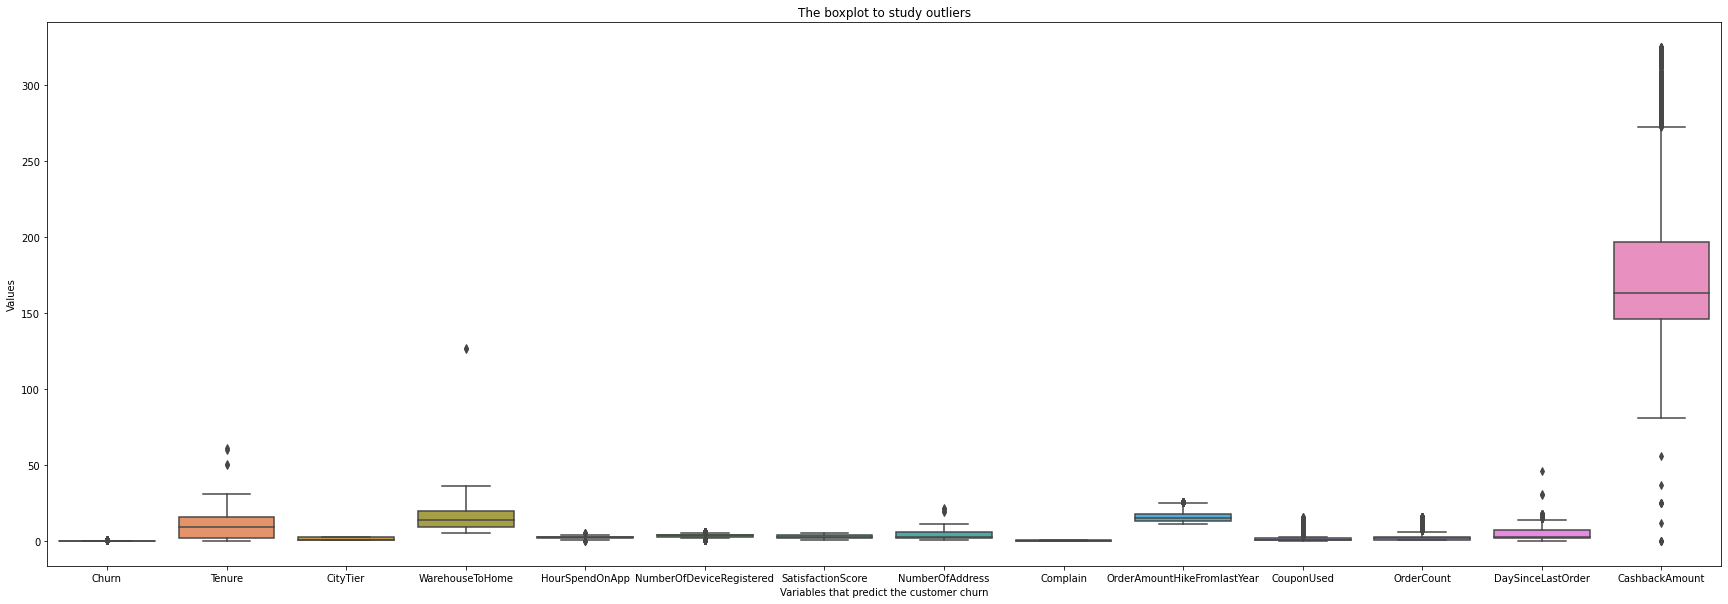

In [14]:
# inspection about the outliers
plt.figure(figsize=(30,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

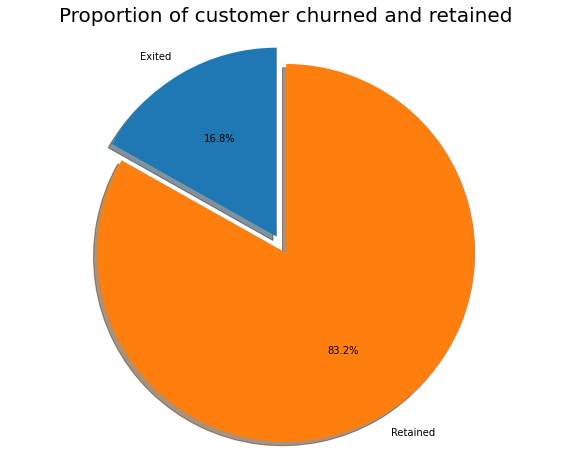

In [15]:
labels = 'Exited', 'Retained'
sizes = [df.Churn[df['Churn'] == 1].count(), df.Churn[df['Churn'] == 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [16]:
# Creating a new dataframe by dropping all the null values from df in order to plot the plotly histogram
df1 = df.dropna(axis = 0)
fig = px.histogram(df1, x="Churn", color="Tenure", barmode="group", title="<b>Customer tenure distribution<b>")
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

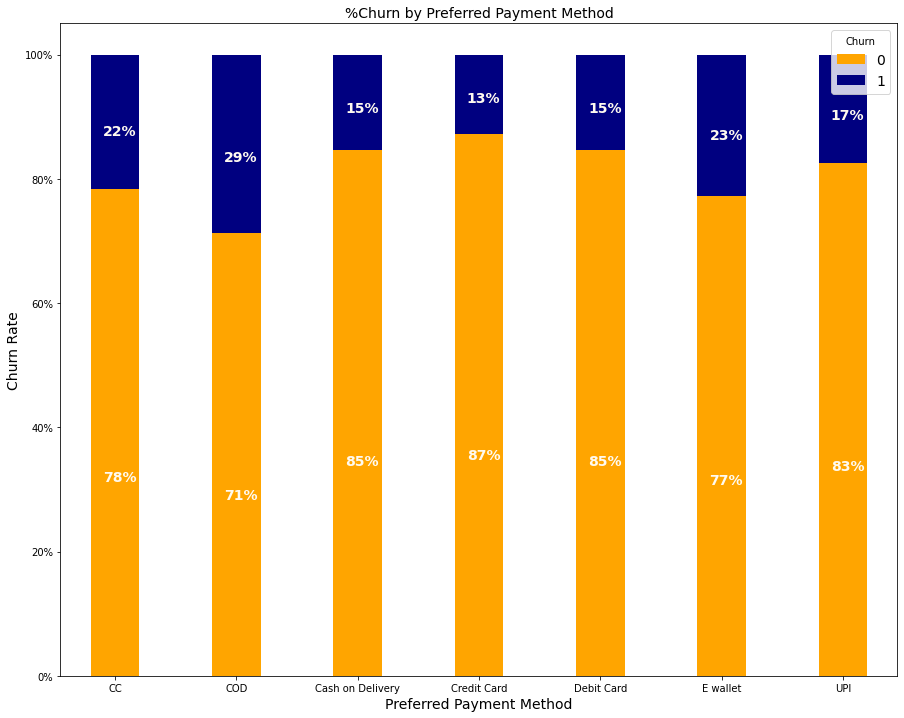

In [17]:
colors = ['#FFA500','#000080']
contract_churn = df.groupby(['PreferredPaymentMode','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.4,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,12),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('Churn Rate',size = 14)
ax.set_xlabel('Preferred Payment Method',size = 14)
ax.set_title('%Churn by Preferred Payment Method',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = '#FFFAF0',
               weight = 'bold',
               size = 14)

In [18]:
x_ind = df.drop('Churn', axis = 1)
y_dep = df['Churn']

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
# labelling the object type variables
for i in x_ind:
    x_ind[i] = le.fit_transform(x_ind[i].astype(str).values)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [22]:
# applying iterative imputer to impute the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
df = imp.fit_transform(x_ind)

[IterativeImputer] Completing matrix with shape (5630, 18)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.11
[IterativeImputer] Change: 0.0, scaled tolerance: 2.585 
[IterativeImputer] Early stopping criterion reached.


In [23]:
df = pd.DataFrame(df)

In [31]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x_ind, y_dep, test_size=0.33, random_state=1)

In [26]:
# Decision tree
churn_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=10, random_state=0)
churn_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=10,
                       random_state=0)

In [27]:
# predicting the for the X_test
y_predicted = churn_classifier.predict(X_test)

In [28]:
cr = classification_report(y_test, y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1554
           1       0.67      0.64      0.66       304

    accuracy                           0.89      1858
   macro avg       0.80      0.79      0.79      1858
weighted avg       0.89      0.89      0.89      1858



[[1458   96]
 [ 109  195]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

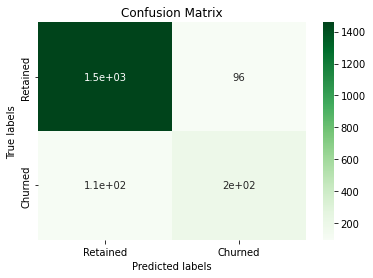

In [32]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, y_predicted)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [33]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

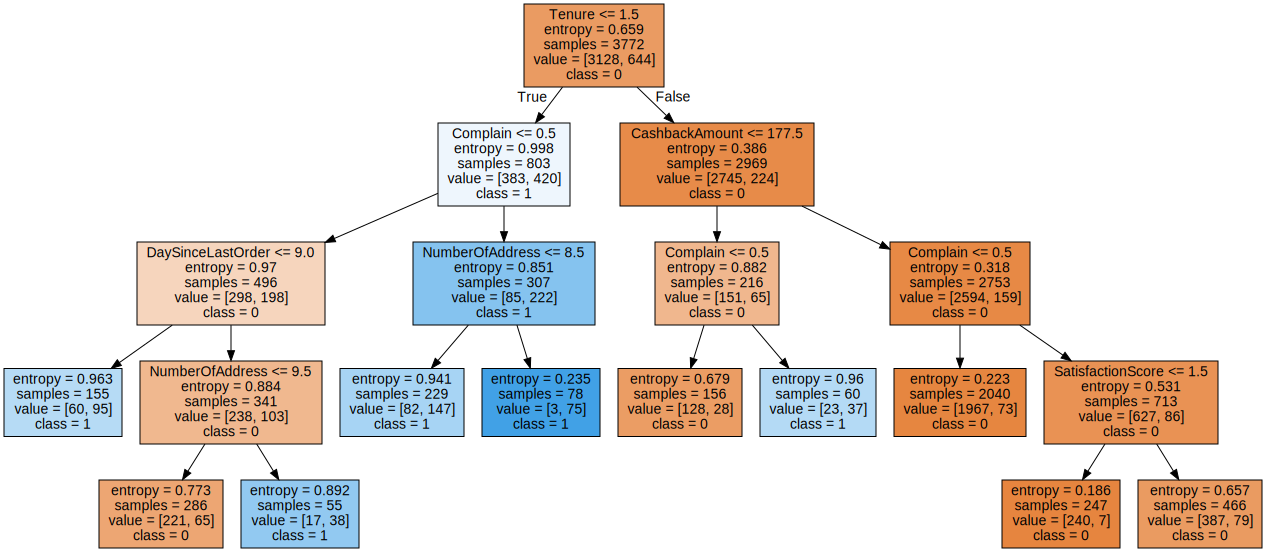

In [34]:
# Visualization of the decision tree
graph = Source(tree.export_graphviz(churn_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))